<a href="https://colab.research.google.com/github/EAFIT-BI/Supervised-Learning-2024-II/blob/main/Modelos_de_regresi%C3%B3n_regularizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelos de regresión regularizados

La regularización es una estrategia para reducir la complejidad de los modelos a través del control del tamaño de sus coeficientes. En el caso de la regularización **Lasso** o $L_1$, se anulan algunos coeficientes, mientras en **Ridge** o $L_2$ se le asignan valores muy pequeños

In [52]:
#importamos las librerías iniciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

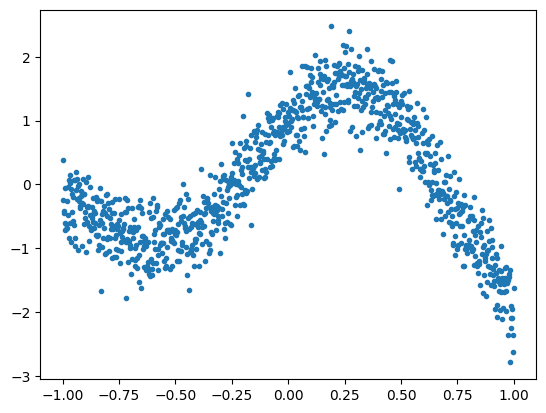

In [53]:
#para ejemplificar, trabajaremos con el toyset de la regresión lineal

X = np.linspace(-1, 1, 1000)
ruido = np.random.normal(0, 0.333, 1000)

y = np.sin(4*X) + np.cos(3*X) + ruido

#graficamos el toyset
plt.plot(X, y, '.');

In [54]:
#vamos a ajustar el modelo como lo hicimos en el caso de la regresión múltiple
#con el polinomio de grado 5

#importamos las librerías adicionales
from sklearn.model_selection import cross_val_score #para la validación cruzada
from sklearn.pipeline import Pipeline #para generar el pipeline de procesamiento
from sklearn.preprocessing import PolynomialFeatures #para generar las características polinómicas
from sklearn.linear_model import LinearRegression #para el modelo de regresión

In [55]:
#reorganizamos las dimensiones de X
X = X.reshape(-1, 1)

#generamos el pipeline
pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('model', LinearRegression(fit_intercept = True))])

#generamos los posibles grados del polinomio para que sean sintonizados
degrees = range(2,16)

#inicializamos la lista de scores que será nuestra métrica de calidad del modelo
scores = []

#inicializamos la lista del promedio de los scores
mean_scores = []

In [56]:
#construimos el ciclo para recorrer los hiperparámetros (en este caso solo el grado)
#con la validación cruzada, calculando el score para cada uno de ellos

for degree in degrees:
  score = cross_val_score(estimator = pipe.set_params(poly__degree = degree),
                          X = X, y = y, cv = 5, scoring = 'neg_mean_squared_error')
  scores.append(score)
  mean_scores.append(-score.mean())

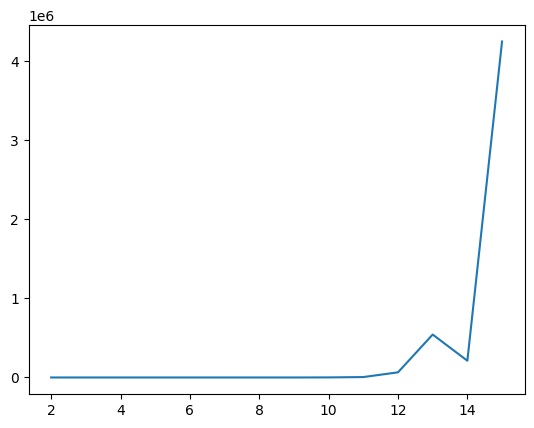

In [57]:
#visualizamos el resultado
plt.plot(degrees, mean_scores, '-');

In [58]:
#numéricamente, tendremos el siguiente RMSE

print(f'El mejor RMSE para el conjunto de entrenamiento es {min(mean_scores):.2f}')

El mejor RMSE para el conjunto de entrenamiento es 0.17


# Sintonización de parámetros

Vamos a aplicar la regularización al modelo para ver si mejora el desempeño. En este caso tendremos que sintonizar el parámetro $\lambda \in [0, \infty)$

## Regularización $L_2$ (Ridge)

In [59]:
#importamos librerías adicionales
from sklearn.linear_model import Ridge #para el modelo de regresión Ridge
from sklearn.metrics import mean_squared_error #para calcular el RMSE
from sklearn.model_selection import train_test_split #para dividir el conjunto de entrenamiento y prueba

In [60]:
#realizamos la participación de los datos en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 5)

In [61]:
#generamos las características polinómicas, ya que el grado ya está sintonizado
poly = PolynomialFeatures(degree = 5)
X_train_p = poly.fit_transform(X_train) #X_train polinómico

#instanciar el modelo
model = Ridge()

#generamos los posibles valores de lambda (al que llamaremos alpha) para la regularización
alpha = np.logspace(-4,2)

#creamos un diccionario con todos los hiperparámetros a sintonizar
grid = dict(alpha = alpha)

#importamos librerías adicionales
from sklearn.model_selection import GridSearchCV

#instanciamos la búsqueda por grid o exhaustiva
grid_search = GridSearchCV(estimator = model, param_grid = grid,
                           n_jobs = 1, cv = 5, scoring = 'neg_mean_squared_error')

#generamos la búsqueda con el conjunto de entrenamiento
grid_result = grid_search.fit(X_train_p, y_train)

In [62]:
#extraemos el valor del hiperparámetro sintonizado
best_alpha = grid_result.best_params_['alpha']

#visualizamos la información
print(f'El mejor RMSE fue de {-grid_result.best_score_:.2f}, con un lambda de {best_alpha}')


El mejor RMSE fue de 0.12, con un lambda de 0.0001


In [63]:
#ahora evaluamos el modelo con el conjunto de test o los datos de prueba

#tomamos el mejor modelo de la búsqueda
best_model = grid_search.best_estimator_

#transformamos los datos de prueba a las características polinómicas
X_test_p = poly.transform(X_test)

#aplicamos el modelo a los datos de prueba
y_pred = best_model.predict(X_test_p)

#calculamos el RMSE
RMSE = mean_squared_error(y_test, y_pred)

#visualizamos el resultado
print(f'El RMSE para el conjunto de prueba es {RMSE:.2f}')

El RMSE para el conjunto de prueba es 0.12


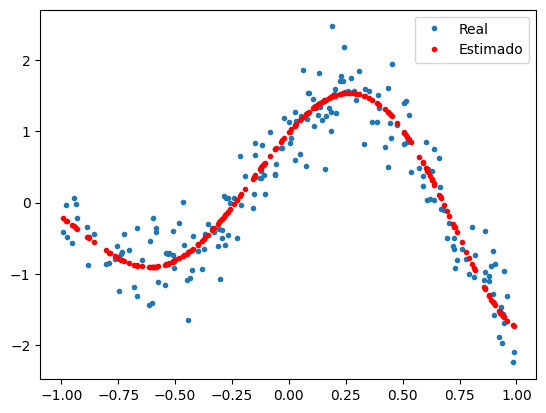

In [64]:
#gráficamente, tendremos:

plt.plot(X_test, y_test, '.', label = 'Real' );
plt.plot(X_test, y_pred, '.r', label = 'Estimado');
plt.legend();

# Ejemplo

Cargar el archio `auto-mpg.data`. Asigna a las columnas los nombres indicados en el archivo `auto-mpg.names`. Configura como índice la variable `car_name`.

Realiza el modelo de regresión Ridge que prediga la variable `mpg` usando todas las demás variables como predictoras. Para ello realiza una partición de los datos en subconjuntos de entrenamiento y prueba con una proporción de 70/30, usando `random_state = 1`.

Reporta el valor de $\lambda$ encontrado, el RMSE de entrenamiento y el de prueba y los pesos del modelo.

Repite este ejercicio con un modelo de regresión Lasso.

In [65]:
#cargamos el archivo
import pandas as pd
import numpy as npf
import matplotlib.pyplot as plt

carros = pd.read_csv('auto-mpg.data', sep = '\s+', header = None,
                     na_values = ['?'], names = ['mpg', 'cylinders',
                                                 'displacement', 'horsepower',
                                                 'weight', 'acceleration',
                                                 'model_year', 'origin', 'car_name'])


In [66]:
carros.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [67]:
#revisamos la calidad de los datos con un pequeño EDA
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [68]:
#en una tarea de ML supervisado, la variable a predecir debe ser la de mejor
#calidad, por ello vamos a tomar SOLO los registros para los cuales mpg
#sea no nulo

carros = carros[carros['mpg'].notnull()]

In [69]:
#dado la naturaleza del conjunto de datos, es posible imputar los datos faltantes
#de la variable horsepower

carros['horsepower'].fillna(value = carros['horsepower'].mean(),inplace = True)

#fijamos el index en la variable car_name
carros.set_index('car_name', inplace = True)

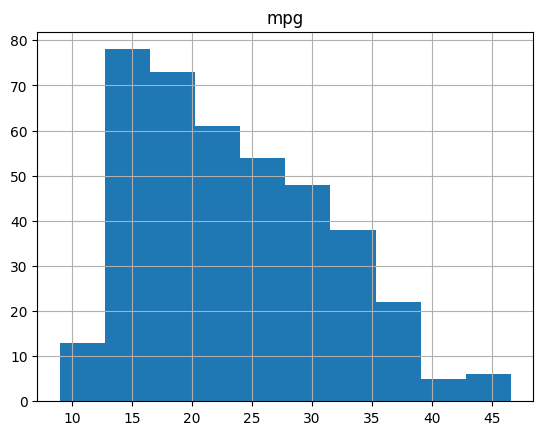

In [70]:
#graficamos el histograma y el diagrama de cajas y bigotes para
# identificar posibles datos atípicos (como primera visualización)

carros.hist(column = 'mpg')
plt.show()

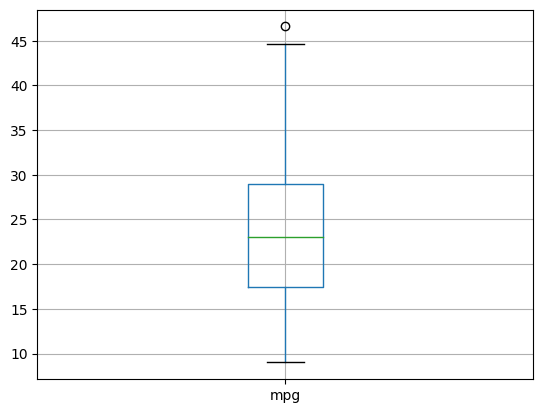

In [71]:
carros.boxplot(column = 'mpg')
plt.show()

In [72]:
from sklearn.model_selection import train_test_split

#tomamos las variables predictoras en X y la variable a predecir en y
X = carros.drop('mpg', axis = 1)
y = carros['mpg']

#hacemos la partición en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 1)

## Ridge

In [73]:
#instanciamos el modelo
model = Ridge()

#creamos el diccionario
grid = dict(alpha = np.logspace(-4,2))

#instanciamos la búsqueda
grid_search = GridSearchCV(estimator = model, param_grid = grid,
                           n_jobs = 1, cv = 5, scoring = 'neg_mean_squared_error')

#generamos la búsqueda
grid_result = grid_search.fit(X_train, y_train)

In [74]:
#mostramos el mejor RMSE con el hiperparámetro sintonizado
print(f'El mejor RMSE fue de {-grid_result.best_score_:.2f},con un lambda de {grid_result.best_params_["alpha"]}')

El mejor RMSE fue de 12.88,con un lambda de 32.3745754281764


## Lasso

In [75]:
#para ignorar los warning
import warnings
warnings.filterwarnings("ignore")

In [76]:
#importamos el modelo Lasso
from sklearn.linear_model import Lasso

#inicializamos la lista de coeficientes
coeficientes = []

#definimos los posibles valores que puede tomar lambda (alpha)
alphas = [0, 0.01, 0.1, 1, 10, 100]

#creamos el ciclo para la sintonización de lambda
for alpha in alphas:
  #instanciamos el modelo
  model = Lasso(alpha = alpha)
  #entrenamos el modelo
  model.fit(X_train, y_train)
  #guardamos los coeficientes
  coeficientes.append(model.coef_)

#creamos una tabla con los coeficientes de las características para
#analizar la contribución de cada una de ella a la regresión

df_lasso = pd.DataFrame(data = coeficientes,
                        columns = model.feature_names_in_,
                        index = alphas)

#mostramos la tabla
df_lasso

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0.00,-0.394579,0.022756,-0.019285,-0.007056,0.064152,0.793118,1.191301
0.01,-0.346630,0.021702,-0.019314,-0.007046,0.059602,0.792189,1.157844
0.10,-0.000000,0.013601,-0.019558,-0.006954,0.019785,0.783488,0.866682
1.00,-0.000000,0.004737,-0.011075,-0.006872,0.000000,0.700973,0.000000
10.00,-0.000000,-0.004274,-0.013592,-0.006636,0.000000,0.000000,0.000000
100.00,-0.000000,-0.000000,-0.000000,-0.007517,0.000000,0.000000,0.000000


In [77]:
#en este caso, entrenaremos con alpha = 0.1 y alpha = 0.01
#para alpha = 0.1

model = Lasso(alpha = 0.10)
#entrenamos el modelo
model.fit(X_train, y_train)
#calculamos el error cuadrático medio para train y para test
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))

#mostramos el error
print(f'El error cuadrático medio para el conjunto de entrenamiento es {train_error:.2f}')
print(f'El error cuadrático medio para el conjunto de prueba es {test_error:.2f}')

El error cuadrático medio para el conjunto de entrenamiento es 11.96
El error cuadrático medio para el conjunto de prueba es 9.23


In [78]:
#en este caso, entrenaremos con alpha = 0.1 y alpha = 0.01
#para alpha = 0.01

model = Lasso(alpha = 0.01)
#entrenamos el modelo
model.fit(X_train, y_train)
#calculamos el error cuadrático medio para train y para test
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))

#mostramos el error
print(f'El error cuadrático medio para el conjunto de entrenamiento es {train_error:.2f}')
print(f'El error cuadrático medio para el conjunto de prueba es {test_error:.2f}')

El error cuadrático medio para el conjunto de entrenamiento es 11.89
El error cuadrático medio para el conjunto de prueba es 8.97


# Preprocesamiento como parte del flujo de trabajo en modelos lineales

Idealmente, el preprocesamiento se debe incluir en el *pipeline* de sintonización de hiperparámetros, pero para efectos ilustrativos lo haremos como una etapa anterior.

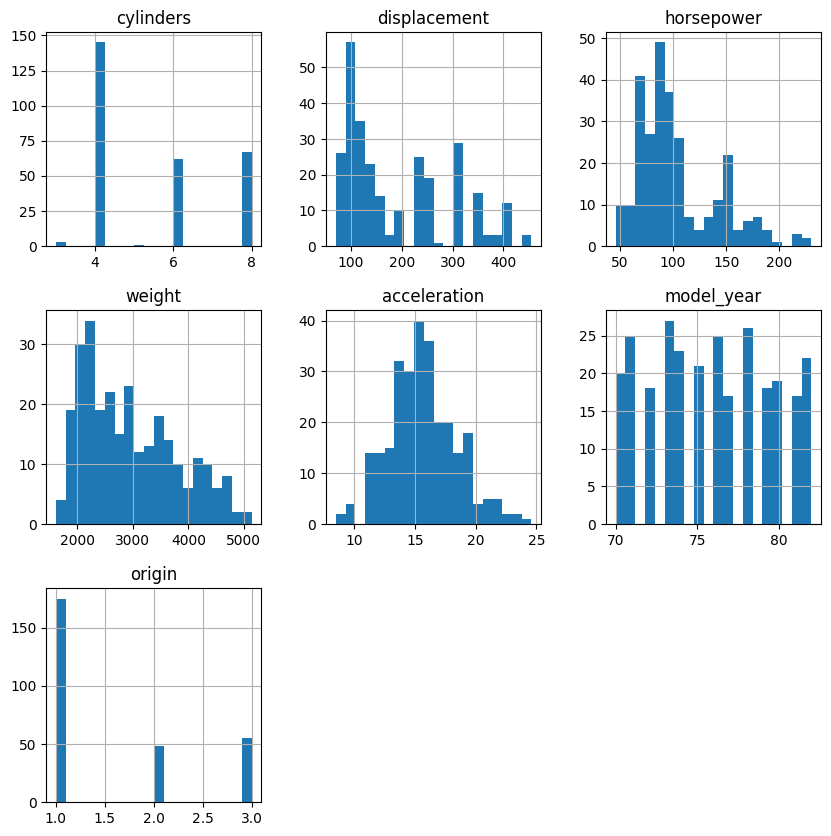

In [79]:
#revisamos los histogramas como aproximación a la distribución de probabilidad de
#cada una de las características de entrenamiento (variables predictoras)
X_train.hist(figsize = (10,10), bins = 20);

Las variables *cylinders*, *origin* son consideradas discretas y es posible no aplicar ningún preprocesamiento
*model year* se pueden considerar discreto pero dada su distribución se puede aplicar un `MinMaxScaler`. La variable `weight` tiene una distribución con sesgo, por ello es mejor aplicar una transformación logarítmica. Para el caso de la variable `acceleration`es un poco más conveniente alplicar una estandarización.

In [81]:
#definimos las librerías para el preprocesamiento
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

#instanciamos los preprocesadores
scaler = StandardScaler()
minmax = MinMaxScaler()
power = PowerTransformer()

#definimos las listas de variables para cada uno de los casos
features_scaler = ['acceleration']
features_minmax = ['horsepower', 'model_year', 'displacement']
features_power = ['weight']

#aplicamos el preprocesamiento
X_scaler = scaler.fit_transform(X[features_scaler])
X_minmax = minmax.fit_transform(X[features_minmax])
X_power = power.fit_transform(X[features_power])

#concatenamos todas las variables nuevamente en una sola X
X_pre = np.concatenate((X_scaler, X_minmax, X_power, X[['origin']], X[['cylinders']]), axis = 1)

In [82]:
#aplicamos la regularización en la regresión como anteriormente

X_train_p, X_test_p, y_train, y_test = train_test_split(X_pre, y,
                                                    test_size = 0.3,
                                                    random_state = 1)

#instanciamos el modelo
model = Lasso()

#armamos el grid para escoger el lambda
grid = dict(alpha = np.logspace(-4,2))

#instanciamos la búsqueda
grid_search = GridSearchCV(estimator = model, param_grid = grid,
                           n_jobs = 1, cv = 5, scoring = 'neg_mean_squared_error')

#generamos la búsqueda
grid_search.fit(X_train_p, y_train)
#imprimimos el mejor score
print(f'El mejor RMSE fue de {-grid_search.best_score_:.2f},con un lambda de {grid_search.best_params_["alpha"]}')
#

El mejor RMSE fue de 10.25,con un lambda de 0.009102981779915217


In [83]:
#Calculamos la métrica con el conjunto de test
test_error = mean_squared_error(y_test, grid_search.predict(X_test_p))

In [84]:
test_error

8.239025060543286